# Funciones de Hash

<font color="#f00">

NOTA IMPORTANTE:

Las preguntas están marcadas en color rojo. Para la entrega, prepara un documento separado que solo contenga las preguntas y tus respuestas

**Entrega solo ese documento en formato PDF**

</font>

La librería PyCryptoDome tiene funciones de hash para varios algoritmos. Vamos a cargar algunas de ellas. La lista completa está en: https://pycryptodome.readthedocs.io/en/latest/src/hash/hash.html

(Recuerda: MD5 está obsoleto y roto, no se tiene que utilizar en aplicaciones reales)

In [ ]:
!pip install pycryptodome
import time
from Crypto.Hash import MD5, SHA256, SHA512, SHA3_256

Tradicionalmente, una función de hash se va alimentanto de datos (`update()`) hasta que necesitas el hash (también llamado "digest"). Este procedimiento de `update()` funciona, por ejemplo, si tienes que calcular el hash de un conjunto de mensajes o lees los bytes bloque a bloque de un archivo grande.

In [ ]:
hasher = SHA256.new()
hasher.update(b'hola')
hasher.update(b'mundo')
hash1 = hasher.hexdigest()
print(hash1)

Si ya conoces el mensaje puedes hacerlo todo en una sola línea como en el ejemplo siguiente. Observa que el hash coincide con el calculado antes.

In [ ]:
hash2 = SHA256.new(data=b'holamundo').hexdigest()
print(hash2)
print(hash1 == hash2)

¿Qué pasa si cambiamos ligeramente el mensaje? Por ejemplo, añadimos un espacio, o ponemos letras en mayúsculas, o signos de admiración...

In [ ]:
hash2 = SHA256.new(data=b'hola mundo').hexdigest()
print(hash2)
print(hash1 == hash2)

<font color="#f00">
PREGUNTAS:

- Prueba varios cambios en el mensaje "hola mundo" y apunta los hashes, verás que cambian totalmente por muy pequeños que sean los cambios: algunas mayúsculas, números, signos de puntuación...
- ¿Cuántos mensajes existen que tengan el mismo hash que "hola mundo"?
- ¿Podrías encontrar alguno de estos mensajes que tengan el mismo hash que "hola mundo"?
- Calcula el valor de hash de un archivo de texto TXT con el texto "hola mundo" en tu PX desde línea de comandos. ¿Coincide con el hash anterior? NOTA: asegúrate de que no hay "nueva línea" al final del archivo.
    - Powershell en Windows: `Get-FileHash NOMBREDEARCHIVO`
    - Linux/OSX: `sha256sum NOMBREDEARCHIVO`
- Cambia el nombre del archivo y calcula su hash. ¿Ha cambiado el hash al cambiar el nombre del archivo?
</font>

<P><FONT COLOR="#00F">
RESPUESTA: texto de tu respuesta
</FONT></P>

# Tamaño de un resumen hash

Fíjate: el hash SHA256 siempre tiene la misma longitud, sea como sea de largo el texto de la entrada.

- SHA256: longitud 256 bits
- SHA512: longitud 512 bits

In [ ]:
print(SHA256.new(data=b'hola').hexdigest())
print(SHA256.new(data=b'hola mundo').hexdigest())
print(SHA256.new(data=b"""Cryptographic hash functions take arbitrary binary strings as input,
and produce a random-like fixed-length output (called digest or hash value).

It is practically infeasible to derive the original input data from the digest. In other
words, the cryptographic hash function is one-way (pre-image resistance).

Given the digest of one message, it is also practically infeasible to find another
message (second pre-image) with the same digest (weak collision resistance).

Finally, it is infeasible to find two arbitrary messages with the same digest
(strong collision resistance).

Regardless of the hash algorithm, an n bits long digest is at most as secure as a
symmetric encryption algorithm keyed with n/2 bits (birthday attack).

Hash functions can be simply used as integrity checks. In combination with a
public-key algorithm, you can implement a digital signature.""").hexdigest())

En los ejemplos anteriores hemos utilizado la función `hexdigest`, que es como tradicionalmente se presentan los hashes para poder imprimirlos. Esa es la representación hexadecimal de un número. Por ejemplo, el número 14 (decimal) se representa como '0e' (hexadecimal) y el número 254 (decimal) como 'fe' (hexadecimal). Fíjate: 8 bits son un byte, es decir, un número entre 0 y 255 (en decimal), es decir, un número entre 00 y ff (en hexadecimal). **Un byte son dos caracteres hexadecimales**.

Podemos accede a la cadena binariade bytes, sin pasarla a hexadecimal, utilizando la función `digest()` en vez de `hexdigest()`. Pero no podríamos imprimirla.

Así que:

- El resumen SHA256 es de 256 bits, sea como sea el tamaño de la entrada
- 256 bits son **32 bytes**
- Que se representan como **64 caracteres hexadecimales**
- Pero ambas representaciones son equivalentes. Simplemente, una podemos imprimirla y la otra no. A veces querremos imprimir hashes y por eso es común que los veamos en hexadecimal

In [ ]:
hasher = SHA256.new(data=b'hola')
hash_bytes = hasher.digest()
hash_hexa = hasher.hexdigest()

print(f'Valor de hash SHA256 en binario. Longitud={len(hash_bytes)} bytes Valor={hash_bytes}')
print(f'Valor de hash SHA256 en hexadecimal. Longitud={len(hash_hexa)} caracteres Valor={hash_hexa}')

Por tradición, se ha preferido codificar los hashes en hexadecimal y no en base64, que hubiese sido otra opción perfectamente válida.

# Velocidades de cálculo de hash

Vamos a calcular cuántos hashes podemos calcular por segundo.

OJO: este cálculo simplemente nos vale para comparar algoritmos entre sí. Jupyter no tiene acceso a la GPU de tu ordenador, ni Pycryptodome está pensada para gran velocidad. Si exprimes tu ordenador con programas externos seguro que obtendrás números mucho mayores.

**La ejecución de estas líneas puede llevar desde varios segundos a un minuto**. Fíjate en que el bloque empieza con `In[*]` mientras está haciendo cálculos.

In [ ]:
import timeit

NUM=500000
print(f'Calculando {NUM} hashes en MD5, SHA256, SHA512, SHA3_256...')

time_md5 = timeit.timeit(lambda: MD5.new(data=b'hola').hexdigest(), number=NUM)
time_sha256 = timeit.timeit(lambda: SHA256.new(data=b'hola').hexdigest(), number=NUM)
time_sha512 = timeit.timeit(lambda: SHA512.new(data=b'hola').hexdigest(), number=NUM)
time_sha3 = timeit.timeit(lambda: SHA3_256.new(data=b'hola').hexdigest(), number=NUM)

print(f'MD5: spent={time_md5} s speed={NUM / time_md5:.{2}} H/s')
print(f'SHA256: spent={time_sha256} s speed={NUM / time_sha256:.2f} H/s')
print(f'SHA512: spent={time_sha512} s speed={NUM / time_sha512:.2f} H/s')
print(f'SHA3_256: spent={time_sha3} s speed={NUM / time_sha3:.2f} H/s')

<p><font color="#f00">
PREGUNTAS:

- ¿Cuál de los algoritmos es más rápido? ¿Cómo afecta doblar el número de bits (es decir, pasar de 256 a 512 bits)?
- Calcula el hash SHA-256 y SHA-512 de un archivo de unos 500MB en tu ordenador (por ejemplo, una película) ¿Cuánto tiempo le lleva?

</font></p>

<p><font color="#00f">
TU RESPUESTA: texto de tu respuesta
</font></p>


## Proof of work: Hashcat y Bitcoin

Una *proof of work* (*pow*) es un sistema para demostrar que un PC ha estado un tiempo trabajando sin hacer nada más. Originalmente se utilizó para limitar el número de emails que un servidor podía enviar por minuto y limitar los correos de spam: para aceptar un correo de alguien, tiene que poder demostrar que no ha enviado otros correos el los últimos 5 minutos (por ejemplo). La aplicación en correo electrónico no tuvo éxito, y el uso principal de las *proof of work* en la actualidad es el minado de monedas electrónicas como Bitcoin.

Vamos a programar una "Proof of work" muy sencilla inspirada en Hashcat, la misma tecnología utilizada por Bitcoin: "encuentra un número aleatorio tal que al juntarlo a un texto y calcular su hash, el valor de hash empiece por un número determinado de ceros". Funciona así:

¿El hash(12345 + "hola mundo") empieza por 3 ceros? ¿Y si ponemos 12346? ¿tampoco? ¿ y con 12347? La idea es ir probando números hasta que uno por simple azar tenga un hash que empiece por un número determinado de ceros.

Esto es una "proof of work": la única manera que conocemos para que el valor de un hash de un texto empiece por un número determinado de ceros es probar todos los textos uno a uno, hasta que por suerte encontramos ese valor.

La idea de los sistemas que usan proof-of-work como bitcoin es que no se aceptará un nuevo mensaje si el emisor no incluye una "proof of work" junto con el mensaje. Es decir, que pruebe que ha estado X minutos buscando el contador que resulte en un hash correcto. De esta manera se limita el número de mensajes por minuto que puede emitir una persona. Fíjate que encontrar el contador es un proceso costoso, pero comprobar que el contador es correcto es muy rápido: solo tienes que calcular el hash y mirar si empieza con el número correcto de ceros.

Nosotros vamos a utilizar el mensaje "hola mundo" solo para ilustrar. Bitcoin funciona de una manera similar, pero el "mensaje" en Bitcoin es un bloque con las descripciones de las transacciones realizadas en los últimos minutos y sus firmas electrónicas.

Una propuesta de función (poco eficiente) sería así:


In [ ]:
def proof_of_work(msg, effort):
    start = time.time()
    test = '0' * effort
    ctr = 0
    blk = f'{msg}:{ctr}'.encode()
    h = SHA256.new(data=blk).hexdigest()
    while not h[:effort] == test:
        ctr += 1
        blk = f'{msg}:{ctr}'.encode()
        h = SHA256.new(data=blk).hexdigest()
    return dict(proof=blk, hash=h, seconds=time.time() - start)

Y vamos a probar con dos esfuerzos: que el hash "MSG:CONTADOR" empiece por solo un cero, o que empiece por dos ceros, o que empiece por tres ceros.

In [ ]:
print(proof_of_work('hola mundo', effort=1))
print(proof_of_work('hola mundo', effort=2))
print(proof_of_work('hola mundo', effort=3))

<p><font color="#f00">
PREGUNTA: ¿Con qué esfuerzo(=número inicial de ceros en el hash) tu PC necesita (más o menos) 30 segundos para encontrar el contador?
</font></p>

<p><font color="#00f">
TU RESPUESTA: texto de tu respuesta
</font></p>

Nota que encontrar la *proof of work* de unos mensajes llevarán varios minutos y otros serán más rápidos. Puedes probarlo calculando la *proof of work* de diferentes textos como por ejemplo "hola mundo" y tu nombre para el mismo esfuerzo. Verás que el tiempo que le lleva puede ser muy diferente cada vez. La *proof of work* es probabilística, pero se espera que la media lleve un tiempo determinado.

Para que te hagas una idea, puedes comprobar que "el esfuerzo" en los últimos bloques de bitcoin minados es de 20 ceros (Julio de 20204): https://www.blockchain.com/explorer/blocks/btc Este esfuerzo se ha consensuado para que alguien en algún sitio del mundo encuentre un nuevo bitcoin cada 15 minutos aproximadamente por mero azar, pero es probabilístico y unas veces se encontrará antes y otras después. Si la red decide que se están minando bitcoins demasiado rápido, el esfuerzo aumenta. ¿Quién decide cuál es el esfuerzo necesario? Nadie en concreto, es una decisión consensuada entre todos los mineros.

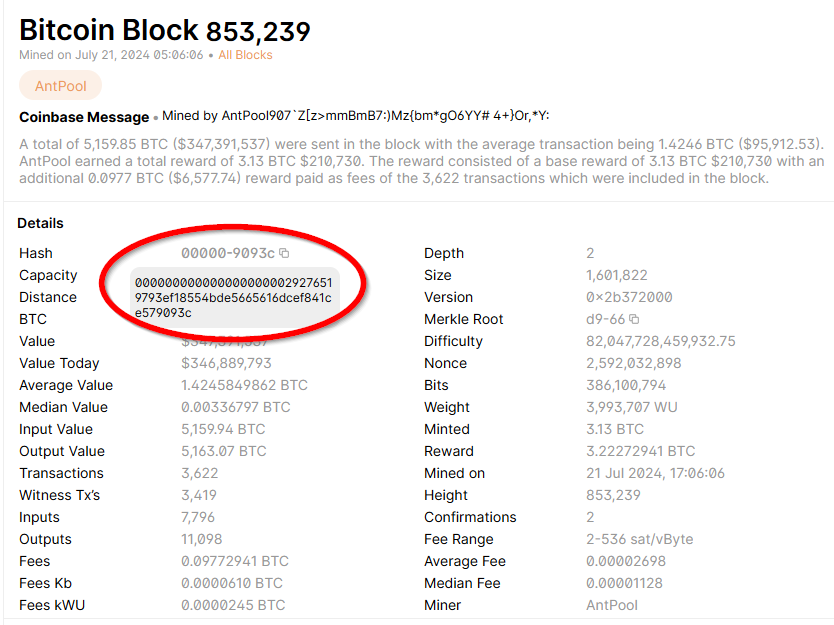

En la actualidad y con los esfuerzos necesarios, es muy poco probable que puedas minar un bitcoin en un PC casero

# Firma Digital

Vamos a aprovechar lo que ya sabemos de cifrado asimétrico y hashes para ver cómo funciona una firma digital.

## Alice firma un documento

In [ ]:
document = b"""Cryptographic hash functions take arbitrary binary strings as input,
and produce a random-like fixed-length output (called digest or hash value).

It is practically infeasible to derive the original input data from the digest. In other
words, the cryptographic hash function is one-way (pre-image resistance).

Given the digest of one message, it is also practically infeasible to find another
message (second pre-image) with the same digest (weak collision resistance).

Finally, it is infeasible to find two arbitrary messages with the same digest
(strong collision resistance).

Regardless of the hash algorithm, an n bits long digest is at most as secure as a
symmetric encryption algorithm keyed with n/2 bits (birthday attack).

Hash functions can be simply used as integrity checks. In combination with a
public-key algorithm, you can implement a digital signature."""

Vamos a generar un par de claves RSA para Alice: una pública `alice_pk` y otra privada `alice_sk`. Recuerda: la clave pública la conoce todo el mundo, la clave privada solo la conoce Alice. Ya veremos cómo se distribuye esa clave pública.

NOTA: En un entorno real esto se hace mucho antes de firmar: ¡el par de claves debería estar preparado y la clave pública distribuida desde meses antes de la firma! Veremos esto en el tema de PKI

In [ ]:
# Clave de 2048 bits de Alice, pública y secreta
from Crypto.PublicKey import RSA
alice_sk = RSA.generate(2048) # Clave secreta de Alice
alice_pk = alice_sk.publickey() # Clave pública de Alice

PyCryptodome ya incluye un módulo para firmar usando las recomendaciones PKCS1. Vamos a aprovechar el módulo, para aprender buenas costumbres y porque PyCryptodome no nos deja utilizar RSA de forma insegura.

Ese módulo de firma:

- Calcula el hash del documento utilizando el hasher que le pasemos (que será SHA256)
- Cifra el hash del documento utilizando la clave privada de Alice
- Todo lo hace siguiendo las recomendaciones PKCS1
- La firma la codifica en base64, para que podamos verla por pantalla (esto no es necesario en realidad)

Finalmente, Alice enviaría en un mensaje el documento y su firma. En realidad, lo más probable es que Alice además cifre el documento utilizando algún tipo de cifrado simétrico como AES para proteger su confidencialidad, pero vamos a obviar esa parte en este ejercicio.

NOTA: dado que se necesita la clave privada de Alice para firmar, **solamente Alice puede generar esta firma de este documento ya que solamente ella conoce su clave privada**.

In [ ]:
from Crypto.Signature import pkcs1_15
from base64 import b64encode, b64decode

hasher = SHA256.new(data=document)
signature = pkcs1_15.new(alice_sk).sign(hasher)

msg = dict(document=document, signature=b64encode(signature))
print(msg)

<p><font color="#f00">
PREGUNTA: ¿Por qué crees que Alice cifra **solamente** el hash del mensaje con RSA, en vez de cifrar directamente **todo** el mensaje con RSA?
</font></p>

<p><font color="#00f">
TU RESPUESTA: texto de tu respuesta
</font></p>

## Bob verifica la firma de Alice

Bob recibe el mensaje `msg`, que incluye el documento y la firma de Alice, y ya conoce la clave pública de alice `alice_pk` de alguna manera (ver tema PKI)

Así que Bob hace el proceso inverso:

- Calcula el hash SHA256 del documento recibido
- Decodifica el base64 y descifra la firma recibida utilizando la clave pública de Alice
- Todo lo hace siguiendo las recomendaciones PKCS1

Como curiosidad, la librería PyCryptodome lanza un error cuando la firma no es válida, y no hace nada si es correcta.

Si la verificación de la firma con la clave pública de Alice es correcta, entonces **Bob sabe que el documento lo ha enviado Alice, y no puede haberlo enviado nadie más**.

In [ ]:
rcv_document = msg['document']
rcv_signature = b64decode(msg['signature'])

pkcs1_15.new(alice_pk).verify(SHA256.new(data=rcv_document), rcv_signature)
print("La firma es válida")

¿Qué pasa si un atacante intercepta el mensaje y cambia el documento? Aquí vemos un ejemplo: el atacante ha interceptado el documento y ha puesto información falsa.

Observa que ahora la firma de Alice no verifica y la función lanza un error.

In [ ]:
rcv_document = b"""Cryptographic hash functions take arbitrary binary strings as input,
and produce a random-like fixed-length output (called digest or hash value).

It is practically infeasible to derive the original input data from the digest. In other
words, the cryptographic hash function is one-way (pre-image resistance).

Given the digest of one message, it is also practically infeasible to find another
message (second pre-image) with the same digest (weak collision resistance).

Finally, it is infeasible to find two arbitrary messages with the same digest
(strong collision resistance).

Regardless of the hash algorithm, an n bits long digest is at most as secure as a
symmetric encryption algorithm keyed with n/3 bits (birthday attack).

Hash functions can be simply used as integrity checks. In combination with a
public-key algorithm, you can implement a digital signature."""

pkcs1_15.new(alice_pk).verify(SHA256.new(data=rcv_document), rcv_signature)
print("La firma es válida")

<p><font color="#f00">
PREGUNTA: ¿Podrías detectar qué parte del mensaje ha cambiado mirando solo la firma electrónica?
</font></p>

<p><font color="#00f">
TU RESPUESTA: texto de tu respuesta
</font></p>

Podemos gestionar los errores con un `try/except` e informar al usuario.

In [ ]:
try:
    pkcs1_15.new(alice_pk).verify(SHA256.new(data=rcv_document), rcv_signature)
    print("La firma es válida")
except ValueError:
    print("La firma NO es válida")